In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import matplotlib.pyplot as plt

def makeMatrix(N, alpha, beta):
    retMatrix = []
    for n in range(N):
        # decide new dishes for the n th customer
        hs = poisson.rvs(alpha * beta / (n + beta))
        
#        print (n, " : ", hs)
        # for each column
        for h in range(hs):
            vec = []
            # intialize N_h
            N_h = 1

            for z in range(n):
                vec.append(0)
            
            # new dish for n th customer
            vec.append(1)
                
            for z in range(n + 1, N):
                # process 2
                # z = n - 1
                if np.random.rand() < (N_h / (z + beta)):
                    vec.append(1)
                    # update N_h
                    N_h += 1
                else:
                    vec.append(0)

            retMatrix.append(vec)

    return np.array(retMatrix).T



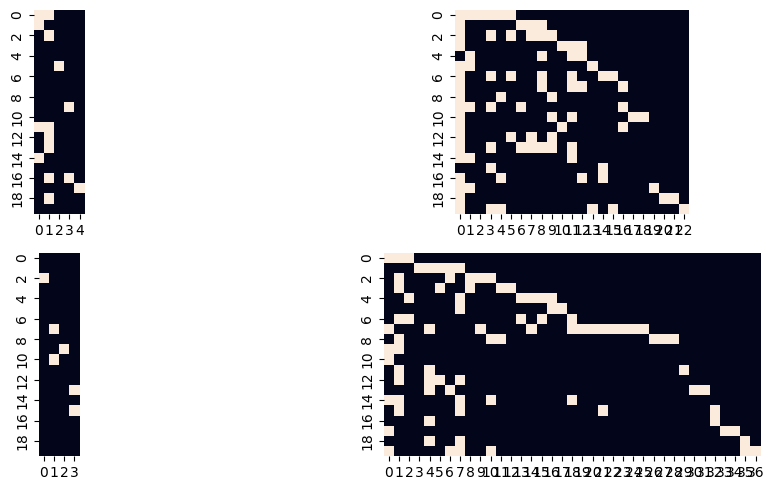

In [2]:
N = 20
ROWS = 2
COLUMNS = 2

alphas = [1.0, 5.0, 1.0, 5.0]
betas = [1.0, 1.0, 5.0, 5.0]

fig, axesTmp = plt.subplots(ROWS, COLUMNS, tight_layout = True, figsize = (20, 5))

axes = axesTmp.ravel()

for alpha, beta, ax in zip(alphas, betas, axes):
    M = makeMatrix(N, alpha, beta)
#    print(M)

    sns.heatmap(M, cbar = False, ax = ax)

    ax.set_aspect(1)

plt.show()

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 0 0]
 [0 1 0 0 1 1]]
[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 1 1]]
[[1 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [1 0 1 0 0]]
[[1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]]
[[1 1 0]
 [0 0 1]]
[[1]
 [0]
 [0]]
[[1]]
[[1]]
[[1]]
[]


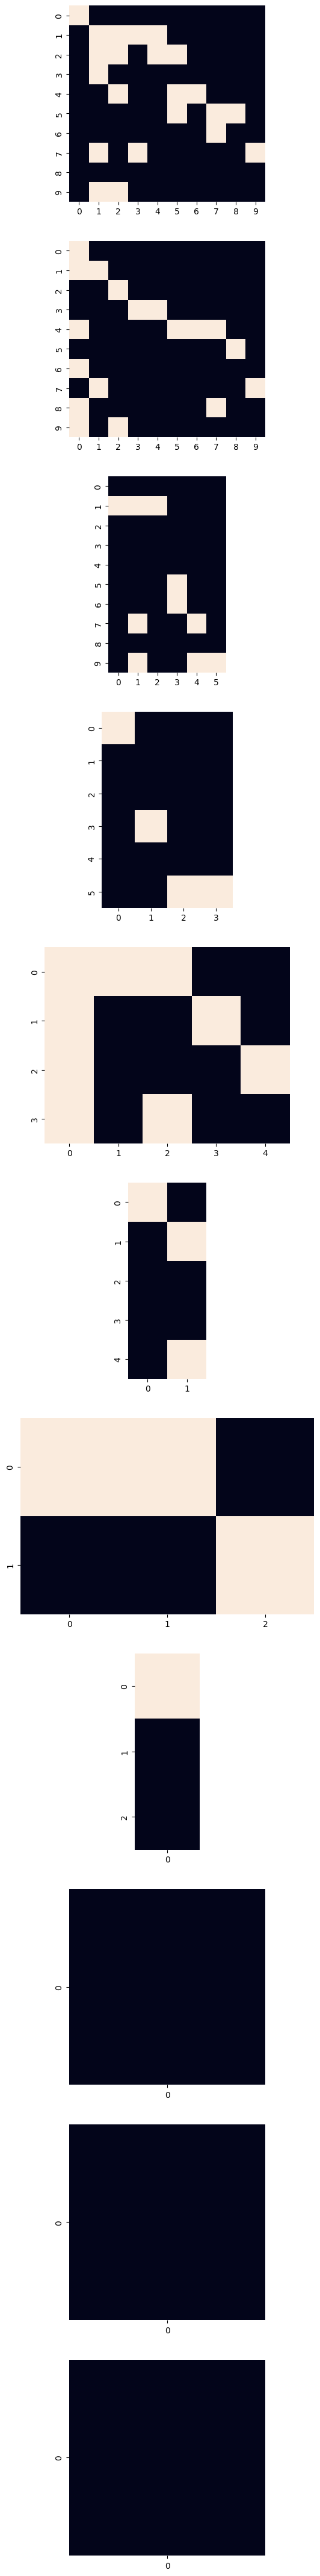

'Digraph.gv.pdf'

In [3]:
# To use graphviz library, install graphviz
# https://graphviz.org/download/
from graphviz import Digraph

N = 10
alpha = 1.0
beta = 3.0

Ms = []

while True:
    M = makeMatrix(N, alpha, beta)

    print(M)

    if M.shape[0] == 0:
        break
    
    N = M.shape[1]

    Ms.append(M)

mLens = len(Ms)

fig, axesTmp = plt.subplots(mLens, 1, figsize = (20, 5 * mLens))

axes = axesTmp.ravel()

for ax, m in zip(axes, Ms):
    sns.heatmap(m, cbar = False, ax = ax)
    ax.set_aspect(1)

plt.show()

g = Digraph()
g.attr('node', shape='circle')

for i, m in enumerate(Ms):
    (r, c) = m.shape

    for j in range(r):
        jNode = "L" + str(i) + "_" + str(j)
        
        if i == 0:
            with g.subgraph(name = ("cluster_L" + str(i))) as LIn:
                LIn.node(jNode, style='filled', fillcolor='green')

        for k in range(c):
            kNode = "L" + str(i+1) + "_" + str(k)

            if j == 0:
                with g.subgraph(name = ("cluster_L" + str(i+1))) as LOut:
                    LOut.node(kNode)

            if m[j, k] == 1:
                g.edge(kNode, jNode)

g.view()    

